# **Assignment 6 - Sentiment Analysis of Amazon Product Reviews**

**_Neural Network and Deep Learning_**

Group 3
 
**Part 1** - Qichun Yu

**Part 2** - Harjinder Singh Dhesi

### Part 1

**Question 1** - Create a Jupyter notebook and import the necessary libraries.

In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Question 2** - Read in the data files for the train and test sets (Amazon_reviews_train.csv and Amazon_reviews_test.csv). Examine the shapes of the datasets and print out the top five records from the train data.

In [2]:
# reading the train and test data files as pandas dataframes

d_train = pd.read_csv('Amazon_reviews_train.csv')       # train data

print('The shape of the training data:', d_train.shape) # shape of the train data

d_test = pd.read_csv('Amazon_reviews_test.csv')         # test data

print('The shape of the test data:', d_test.shape)      # shape of the test data

The shape of the training data: (25000, 2)
The shape of the test data: (25000, 2)


**Both train and test data have 25000 rows and 2 columns.**

In [3]:
# displaying the top five records from the train data

d_train.head()

,review_text,label
0,Stuning even for the non-gamer: This sound tra...,1
1,The best soundtrack ever to anything.: I'm rea...,1
2,Amazing!: This soundtrack is my favorite music...,1
3,Excellent Soundtrack: I truly like this soundt...,1
4,"Remember, Pull Your Jaw Off The Floor After He...",1


In [4]:
# displaying the top five records from the test data

d_test.head()

,review_text,label
0,Great CD: My lovely Pat has one of the GREAT v...,1
1,One of the best game music soundtracks - for a...,1
2,Batteries died within a year ...: I bought thi...,0
3,"works fine, but Maha Energy is better: Check o...",1
4,Great for the non-audiophile: Reviewed quite a...,1


As can be seen that, our data has only **two columns, i.e., review text (our feature) and label (our target labels corresponding to each review)**.

**Question 3** - For convenience when it comes to processing, separate the raw text and the labels for the train and test set. Print the first two reviews from the train text. You should have the following four variables: train_raw comprising the raw text for the train data, train_labels with labels for the train data, test_raw containing raw text for the test data, and test_labels with labels for the test data.

In [5]:
# separating the raw text (reviews) and the labels in both train and test data as values

train_raw = d_train.review_text.values      # train data reviews

train_labels = d_train.label.values         # train data labels

test_raw = d_test.review_text.values        # test data reviews

test_labels = d_test.label.values           # test data labels

In [6]:
# printing the first two reviews from the train raw test

print(train_raw[:2])

['Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'
 "The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny."]


**Question 4** - Normalize the case and tokenize the test and train texts using NLTK's word_tokenize (after importing it, of course – hint: use list comprehension for cleaner code). Print the first review from the train data to check if the tokenization worked. Download punkt from NLTK if it is not already installed in your environment

In [7]:
# importing word tokenizer

import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /home/qichun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
# tokenizng the raw text (reviews) from both train and test data

train_tokens = [word_tokenize(review.lower()) for review in train_raw]   # tokens of train texts

test_tokens = [word_tokenize(review.lower()) for review in test_raw]     # tokens of test texts

In [9]:
# printing the first tokenized review of the train data

print(train_tokens[0]) 

['stuning', 'even', 'for', 'the', 'non-gamer', ':', 'this', 'sound', 'track', 'was', 'beautiful', '!', 'it', 'paints', 'the', 'senery', 'in', 'your', 'mind', 'so', 'well', 'i', 'would', 'recomend', 'it', 'even', 'to', 'people', 'who', 'hate', 'vid', '.', 'game', 'music', '!', 'i', 'have', 'played', 'the', 'game', 'chrono', 'cross', 'but', 'out', 'of', 'all', 'of', 'the', 'games', 'i', 'have', 'ever', 'played', 'it', 'has', 'the', 'best', 'music', '!', 'it', 'backs', 'away', 'from', 'crude', 'keyboarding', 'and', 'takes', 'a', 'fresher', 'step', 'with', 'grate', 'guitars', 'and', 'soulful', 'orchestras', '.', 'it', 'would', 'impress', 'anyone', 'who', 'cares', 'to', 'listen', '!', '^_^']


It can be seen that the **raw text has been tokenized as it was supposed**.

**Question 5** - Import stopwords (built in to NLTK) and punctuation from the string module. Define a function (drop_stop) to remove these tokens from any input tokenized sentence. Download stopwords from NLTK if it is not already installed in your environment.

In [10]:
# importing stop words and punctuation for dropping these words from the raw text

nltk.download("stopwords")
from nltk.corpus import stopwords

from string import punctuation

[nltk_data] Downloading package stopwords to /home/qichun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# a list of english stop words

stop_words = stopwords.words("english")

# a list of all possible punctuation marks

stop_punct = list(punctuation)

# a combined list of all words (stop words and punctuation) that need to be removed

stop_final = stop_words + stop_punct

print(stop_final)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
# a function that drops the above stop words and punctuation marks from the raw text

def drop_stop(input_tokens):
    return [token for token in input_tokens if token not in stop_final]

**Question 6** - Using the defined function (drop_stop), remove the redundant stop words from the train and the test texts. Print the first review of the processed train texts to check if the function worked.

In [13]:
# removing the redundant stop words from train and test texts

train_tokens_nostop = [drop_stop(tokens) for tokens in train_tokens]

test_tokens_nostop = [drop_stop(tokens) for tokens in test_tokens]

In [14]:
# printing the first tokenized review of the train data without all the stop words

print(train_tokens_nostop[0]) 

['stuning', 'even', 'non-gamer', 'sound', 'track', 'beautiful', 'paints', 'senery', 'mind', 'well', 'would', 'recomend', 'even', 'people', 'hate', 'vid', 'game', 'music', 'played', 'game', 'chrono', 'cross', 'games', 'ever', 'played', 'best', 'music', 'backs', 'away', 'crude', 'keyboarding', 'takes', 'fresher', 'step', 'grate', 'guitars', 'soulful', 'orchestras', 'would', 'impress', 'anyone', 'cares', 'listen', '^_^']


It can be observed that, **all the stop words and punctuations have been removed from the text**.

**Question 7** - Using Porter Stemmer from NLTK, stem the tokens for the train and test data.

In [15]:
# importing Porter Stemmer from NLTK to return the stems of the words in train and test text

from nltk.stem import PorterStemmer

In [16]:
# creating a Porter Stemmer 

stemmer_p = PorterStemmer()

# stemming of the train text

train_tokens_stem = [[stemmer_p.stem(token) for token in tokens] for tokens in train_tokens_nostop]

# stemming of the test text

test_tokens_stem = [[stemmer_p.stem(token) for token in tokens] for tokens in test_tokens_nostop]

In [17]:
# printing the tokens of first review of the train data reduced their stems

print(train_tokens_stem[0])

['stune', 'even', 'non-gam', 'sound', 'track', 'beauti', 'paint', 'seneri', 'mind', 'well', 'would', 'recomend', 'even', 'peopl', 'hate', 'vid', 'game', 'music', 'play', 'game', 'chrono', 'cross', 'game', 'ever', 'play', 'best', 'music', 'back', 'away', 'crude', 'keyboard', 'take', 'fresher', 'step', 'grate', 'guitar', 'soul', 'orchestra', 'would', 'impress', 'anyon', 'care', 'listen', '^_^']


Though some of the words doesn't make sense after the above step, but **the Stemming step reduced the words in the text to their stems**. 

**Question 8** - Create the strings for each of the train and text reviews. This will help us work with the utilities in Keras to create and pad the sequences. Create the train_texts and test_texts variables. Print the first review from the processed train data to confirm it.

In [18]:
# joining the tokens and creating strings of each train and test reviews

train_texts = [" ".join(txt) for txt in train_tokens_stem]

test_texts = [" ".join(txt) for txt in test_tokens_stem]

In [19]:
# printing the first review from the processed train data

print(train_texts[0])

stune even non-gam sound track beauti paint seneri mind well would recomend even peopl hate vid game music play game chrono cross game ever play best music back away crude keyboard take fresher step grate guitar soul orchestra would impress anyon care listen ^_^


### Part 2

**Question 1** - From the Keras preprocessing utilities for text (keras.preprocessing.text), import the Tokenizer module. Define a vocabulary size of 10000 and instantiate the tokenizer with this vocabulary.

In [20]:
# importing Tokenizer module form keras.preprocessing.text

from tensorflow.keras.preprocessing.text import Tokenizer

In [21]:
# setting up a vocabulary size

vocab_size = 10000

# instantiating the tokenizer with the above vocab size

tok = Tokenizer(num_words = vocab_size)

**Question 2** - Fit the tokenizer on the train texts. This works just like CountVectorizer did in Chapter 4, Deep Learning for Text – Embeddings, and trains the vocabulary. After fitting, use the texts_to_sequences method of the tokenizer on the train and test sets to create the sequences for them. Print the sequence for the first review in the train data.

In [22]:
# fitting the tokenizer created above on train texts

tok.fit_on_texts(train_texts)

# creating sequences for train and test data sets using text_to_sequence method

train_sequences = tok.texts_to_sequences(train_texts)

test_sequences = tok.texts_to_sequences(test_texts)

In [23]:
# printing the sequence for the first review in the train data

print(train_sequences[0])

[22, 516, 7596, 85, 190, 184, 1097, 282, 20, 11, 1264, 22, 56, 370, 9662, 114, 41, 71, 114, 8159, 1453, 114, 51, 71, 29, 41, 58, 182, 2928, 2151, 76, 8160, 816, 2663, 829, 718, 3869, 11, 483, 120, 268, 109]


The above step transforms each text in texts to a sequence of integers. It basically takes each word in the text and replaces it with its corresponding index in the vocabulary dictionary. 

**Question 3** - We need to find the optimal length of the sequences to process in the model. Get the length of the reviews from the train set into a list and plot the histogram of the lengths.

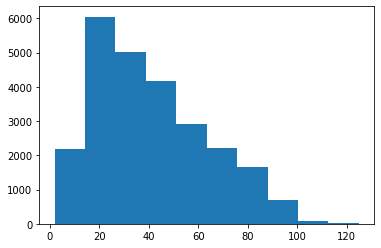

In [24]:
# creating a list of lengths of sequences for each revuew in the train set

seq_lens = [len(seq) for seq in train_sequences]

# plotting a histogram for the above lengths 

plt.hist(seq_lens)
plt.show()

**Question 4** - The data is now in the same format as the IMDb data we used in the chapter. Using a sequence length of 100 (define the maxlen = 100 variable), use the pad_sequences method from the sequence module in Keras' preprocessing utilities (keras.preprocessing.sequence) to limit the sequences to 100 for both the train and test data. Check the shape of the result for the train data.

In [25]:
# setting the standard sequence length equal to 100

max_seq_len = 100

In [26]:
# importing pad_sequences method to limit all the sequences to a specific length of 100

from tensorflow.keras.preprocessing.sequence import pad_sequences

# padding train data sequences

X_train = pad_sequences(train_sequences, maxlen = max_seq_len)

print('The shape of resulting train data:', X_train.shape)

# padding test data sequences 

X_test = pad_sequences(test_sequences, maxlen = max_seq_len)

print('The shape of resulting test data:', X_test.shape)

The shape of resulting train data: (25000, 100)
The shape of resulting test data: (25000, 100)


The above method padded the sequences, the lengths of which were shorter than the max specified length and truncated those with length longer than the max specified length to make all the sequences of same length.

**It can be seen that the length of sequences of all the train data reviews has been made consistent, i.e., = 100**.


**Question 5** - To build the model, import all the necessary layers from Keras (embedding, spatialdropout, LSTM, dropout, and dense) and import the Sequential model. Initialize the Sequential model.


In [27]:
# importing all the necessary layers from keras to develop our model

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, GRU, Dropout, Dense

In [28]:
# initializing the Sequential Model

model = Sequential()

**Question 6** - Add an embedding layer with 32 as the vector size (output_dim). Add a spatial dropout of 40%.

In [29]:
# adding an embedding layer with output vector size = 32

model.add(Embedding(vocab_size, output_dim = 32))

# adding a spatial droupout of 40%

model.add(SpatialDropout1D(0.4))

**Question 7** - Build a stacked LSTM model with 2 layers with 64 cells each. Add a dropout layer with 40% dropout.

In [30]:
# adding stacked LSTM layers to the model

model.add(LSTM(64, return_sequences = True))
model.add(LSTM(64, return_sequences = False))

# adding dropout of 40%

model.add(Dropout(0.4))

**Question 8** - Add a dense layer with 32 neurons with relu activation, then a 50% dropout layer, followed by another dense layer of 32 neurons with relu activation, and follow this up with another dropout layer with 50% dropout.

In [31]:
# adding a dense layer with 32 neurons and relu activation function

model.add(Dense(32, activation = 'relu'))

# adding a dropout of 50%

model.add(Dropout(0.5))

# adding another dense layer with 32 neurons and relu activation function

model.add(Dense(32, activation = 'relu'))

# adding a dropout of 50%

model.add(Dropout(0.5))

**Question 9** - Add a final dense layer with a single neuron with sigmoid activation and compile the model. Print the model summary.

In [32]:
# adding the final dense layer with single layer and sigmoid activation function

model.add(Dense(1, activation = 'sigmoid'))

In [33]:
# compiling the model 

model.compile(loss = 'binary_crossentropy', \
              optimizer = 'rmsprop', \
              metrics = ['accuracy'])

# printing the summary of the model

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, None, 32)          0         
_________________________________________________________________
lstm (LSTM)                  (None, None, 64)          24832     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0

**Question 10** - Fit the model on the training data with a 20% validation split and a batch size of 128. Train for 5 epochs.

In [34]:
# fitting the model with 20% validation split, batch size of 128, and 5 epochs

history_lstm = model.fit(X_train, train_labels, \
               batch_size = 128, \
               validation_split = 0.2, \
               epochs = 5)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 32s 2ms/sample - loss: 0.5711 - accuracy: 0.6976 - val_loss: 0.4070 - val_accuracy: 0.8218
Epoch 2/5
20000/20000 [==============================] - 32s 2ms/sample - loss: 0.3660 - accuracy: 0.8601 - val_loss: 0.3824 - val_accuracy: 0.8318
Epoch 3/5
20000/20000 [==============================] - 30s 1ms/sample - loss: 0.3038 - accuracy: 0.8868 - val_loss: 0.3446 - val_accuracy: 0.8554
Epoch 4/5
20000/20000 [==============================] - 30s 1ms/sample - loss: 0.2680 - accuracy: 0.9015 - val_loss: 0.3908 - val_accuracy: 0.8544
Epoch 5/5
20000/20000 [==============================] - 32s 2ms/sample - loss: 0.2477 - accuracy: 0.9115 - val_loss: 0.3613 - val_accuracy: 0.8564


**Question 11** - Make a prediction on the test set using the predict_classes method of the model. Using the accuracy_score method from scikit-learn, calculate the accuracy on the test set. Also, print out the confusion matrix.

In [35]:
# creating the  prediction set using predict_classes method of the model

test_pred = model.predict_classes(X_test)

In [36]:
# importing confusion_matrix

from sklearn.metrics import accuracy_score, confusion_matrix

# printing the confusion matrix with true test labels and prediction set created above

print(confusion_matrix(test_labels, test_pred))

[[10405  1752]
 [ 1614 11229]]


In [37]:
# printing the accuracy of the model on the test set

print(accuracy_score(test_labels, test_pred))

0.86536


**The accuracy of our stacked LSTM model came out to be 86.5% with the given hyperparameter values**. We can get even better results by further fine tuning those values.